In [7]:
import numpy as np
class Perceptron(object):
    """
    eta: 学习率
    n_iter:权重向量的训练次数
    w_:神经分叉权重向量
    errors_:用于记录神经元判断出错次数
    """
    def __init__(self, eta = 0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        pass
    
    def fit(self, X, y):
        """
        输入训练数据，培训神经元，X输入样本向量，y对应本分类
        加1是因为前面算法提到的w0，也就是步调函数阀值
        """
        #初始化权重向量为0
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            """
            X:[[1,2,3],[4,5,6]]
            y:[1,-1]
            zip(X,y) = [[1,2,3, 1], [4,5,6, -1]]
            """
            for xi, target in zip(X,y):
                """
                update  = η*(y-y')
                """
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                self.errors_.append(errors)
            pass
        pass
    
    def net_input(self, X):
        """
        z = W0*1+ W1*X1 + ...+ Wn*Xn
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
        pass
    
    def predict(self, X):
        # np.where(condition, x, y)
        #满足条件(condition)，输出x，不满足输出y
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        pass

In [8]:
import pandas as pd
df = pd.read_csv("data.csv",header=None)  #数据没有头，设置None
df.head(5)   #显示前5行数据

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=7)  ##显示中文

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

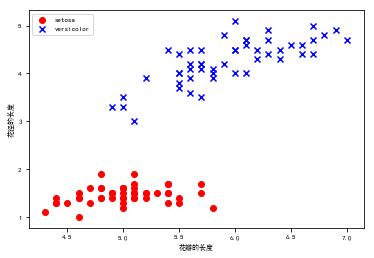

In [10]:
y = df.iloc[0:100,4].values
print(y)
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[0:100,[0,2]].values
#在第0列为x轴，第1列为y轴,用红色的圆圈（marker）画出来。
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('花瓣的长度')
plt.ylabel('花径的长度')
plt.legend(loc='upper left')
plt.show()

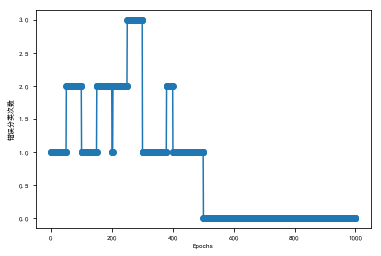

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel('错误分类次数')
plt.show()

from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution=0.02):
    markers = ('s', 'x', 'o', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()
    
    print(x1_min, x1_max)
    print(x2_min, x2_max)
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min ,x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    #print(np.arange(x2_min,x2_max, resolution).shape)
    #print(np.arange(x2_min, x2_max, resolution))
    #print(xx2.shape)
    #print(xx2)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print(xx1.ravel())
    print(xx2.ravel())
    print(Z)
    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        #print(idx, cl)
        plt.scatter(x = X[y==cl, 0], y = X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


3.3 7.0
0.0 5.1
[3.3  3.32 3.34 ... 6.94 6.96 6.98]
[0.   0.   0.   ... 5.08 5.08 5.08]
[-1 -1 -1 ...  1  1  1]


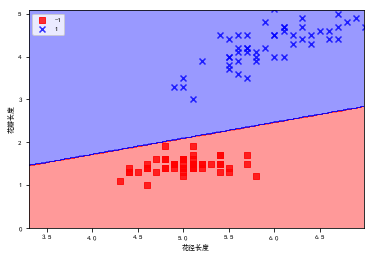

In [12]:
plot_decision_regions(X, y, ppn, resolution=0.02)
plt.xlabel('花径长度')
plt.ylabel('花瓣长度')
plt.legend(loc='upper left')
plt.show()